<a href="https://colab.research.google.com/github/phani-05/Shadowfox-AIML/blob/main/solution_Housing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    

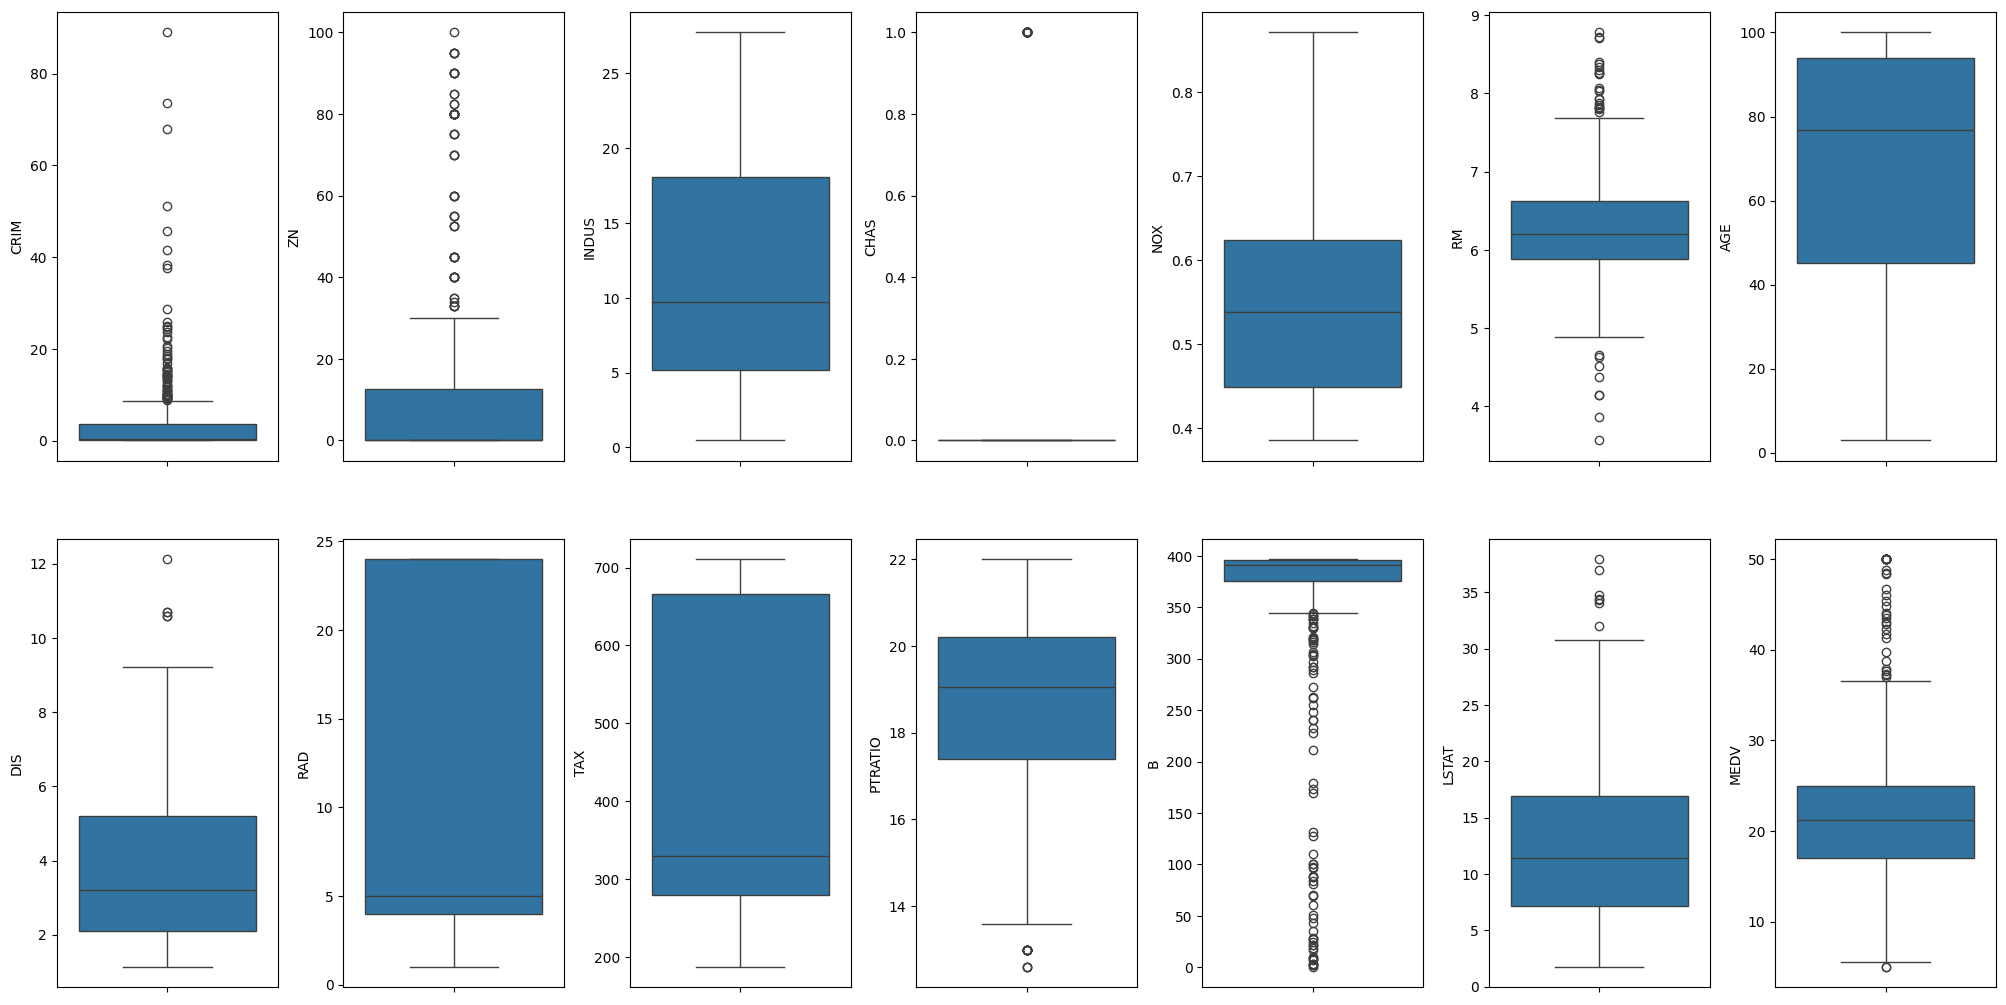

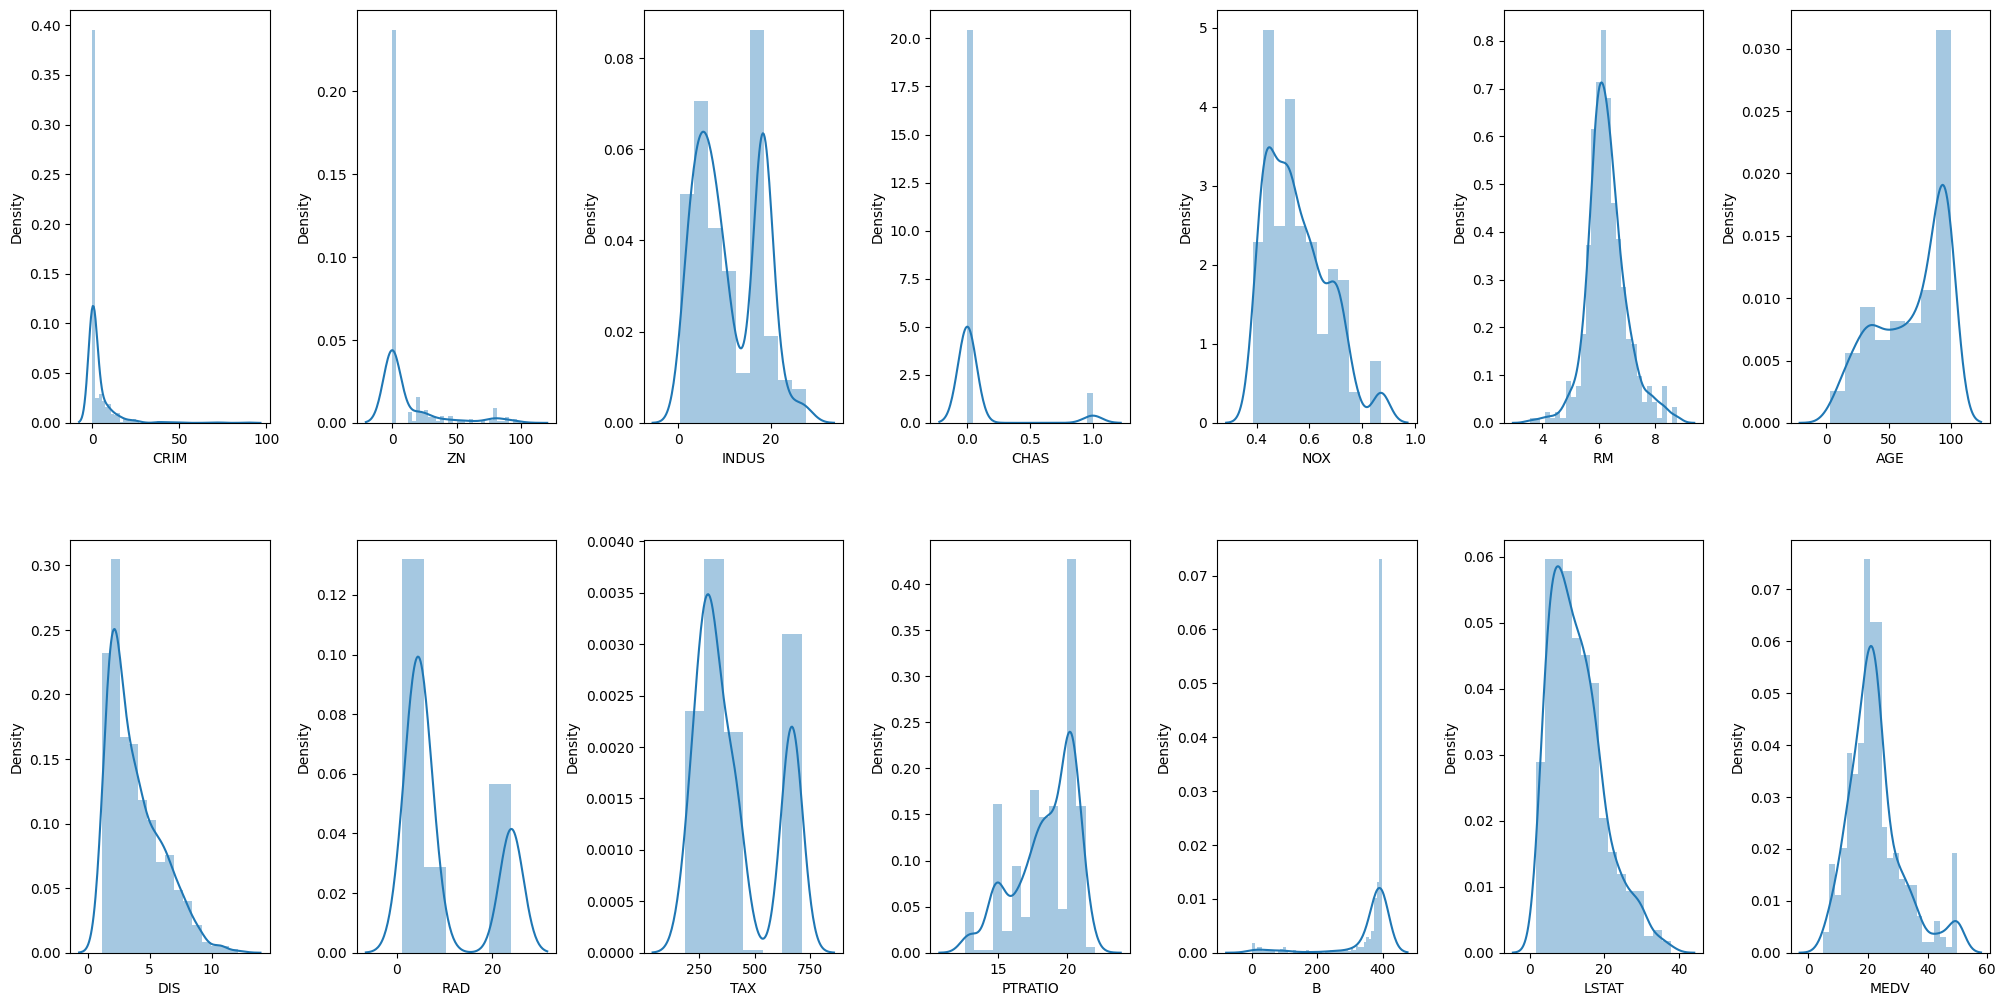

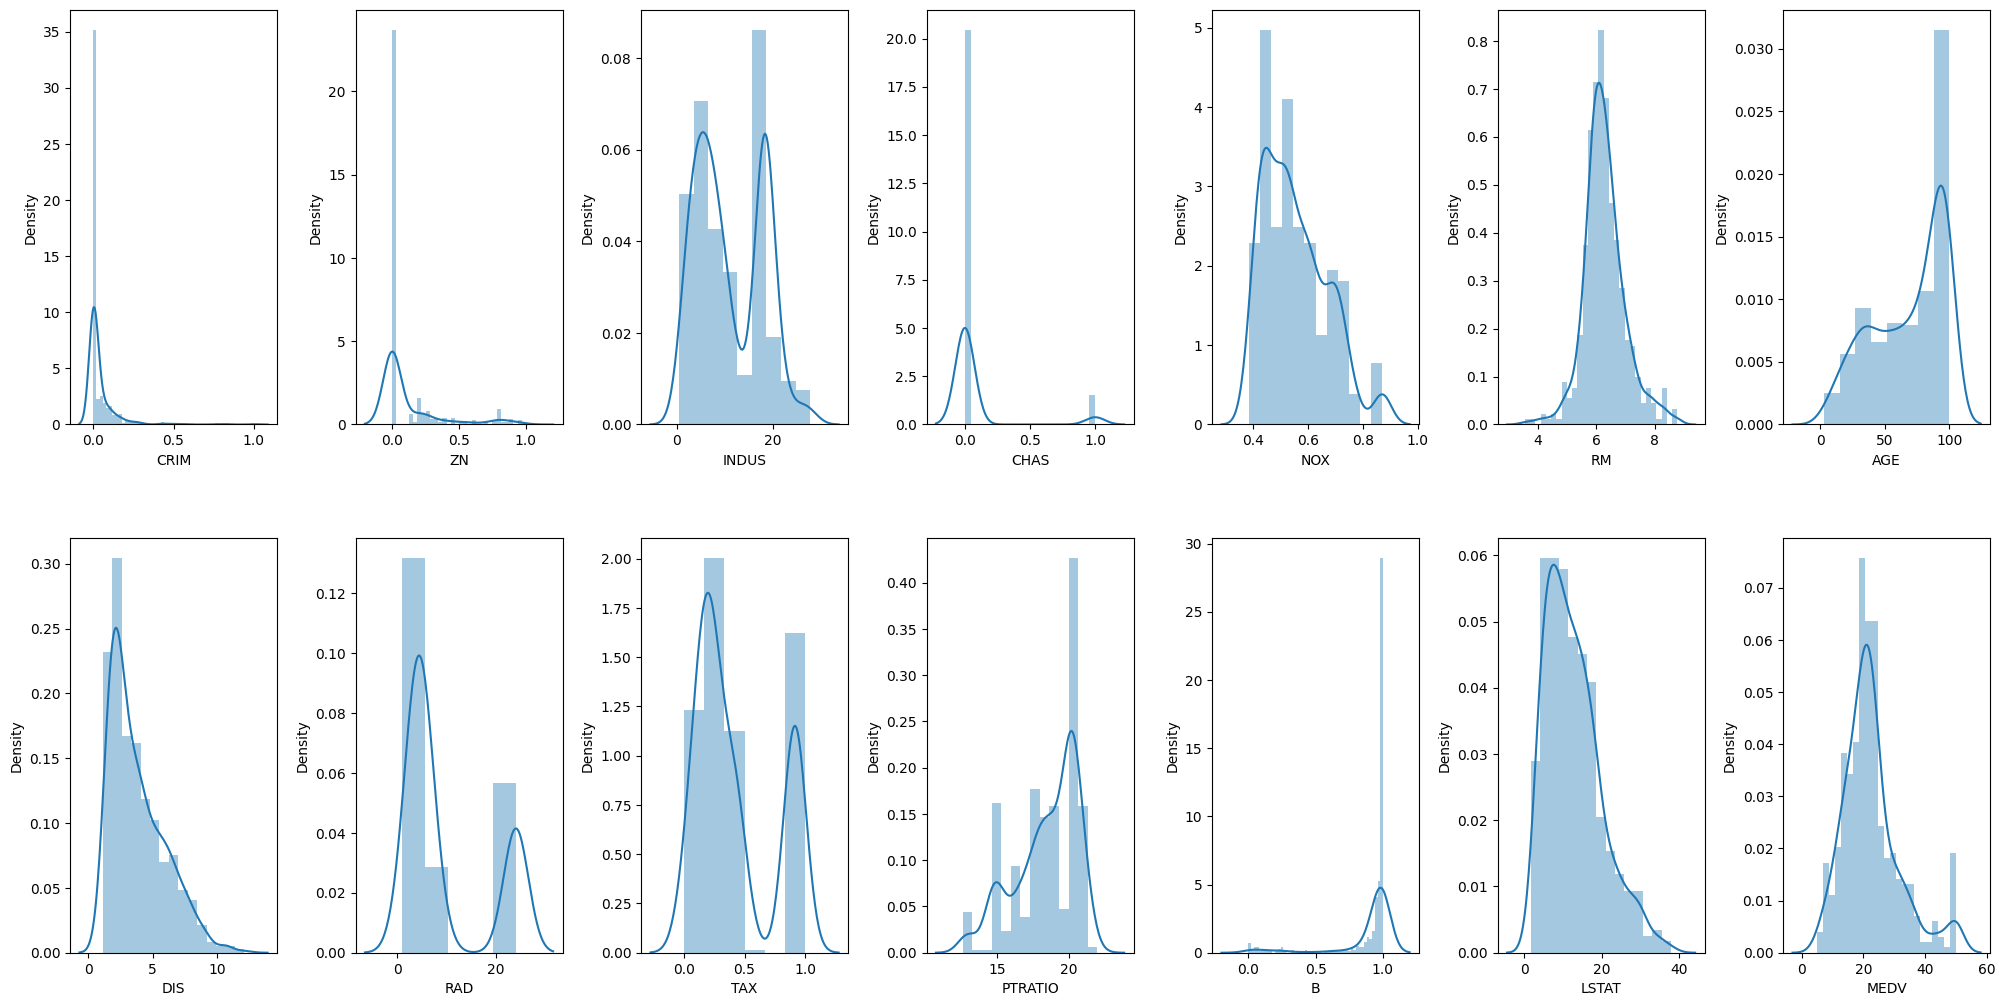

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/sample_data/HousingData.csv')
# df.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
# df.drop(columns=['Unavailable : 0'], axis=0, inplace=True)
print(df.head())

print(df.describe())

print(df.info())



#Pre-processing of the dataset
print(df.isnull().sum())

#creating a box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

cols = ['CRIM', 'ZN', 'TAX', 'B']

for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)



plt.show()

In [ ]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [ ]:

#STANDARDIZATION

from sklearn import preprocessing

scalar = preprocessing.StandardScaler()


#fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.413898,0.290525,-0.666608,0.441052
1,-0.411488,-0.479864,-0.987329,0.441052
2,-0.411491,-0.479864,-0.987329,0.396427
3,-0.410908,-0.479864,-1.106115,0.416163
4,-0.406697,-0.479864,-1.106115,0.441052


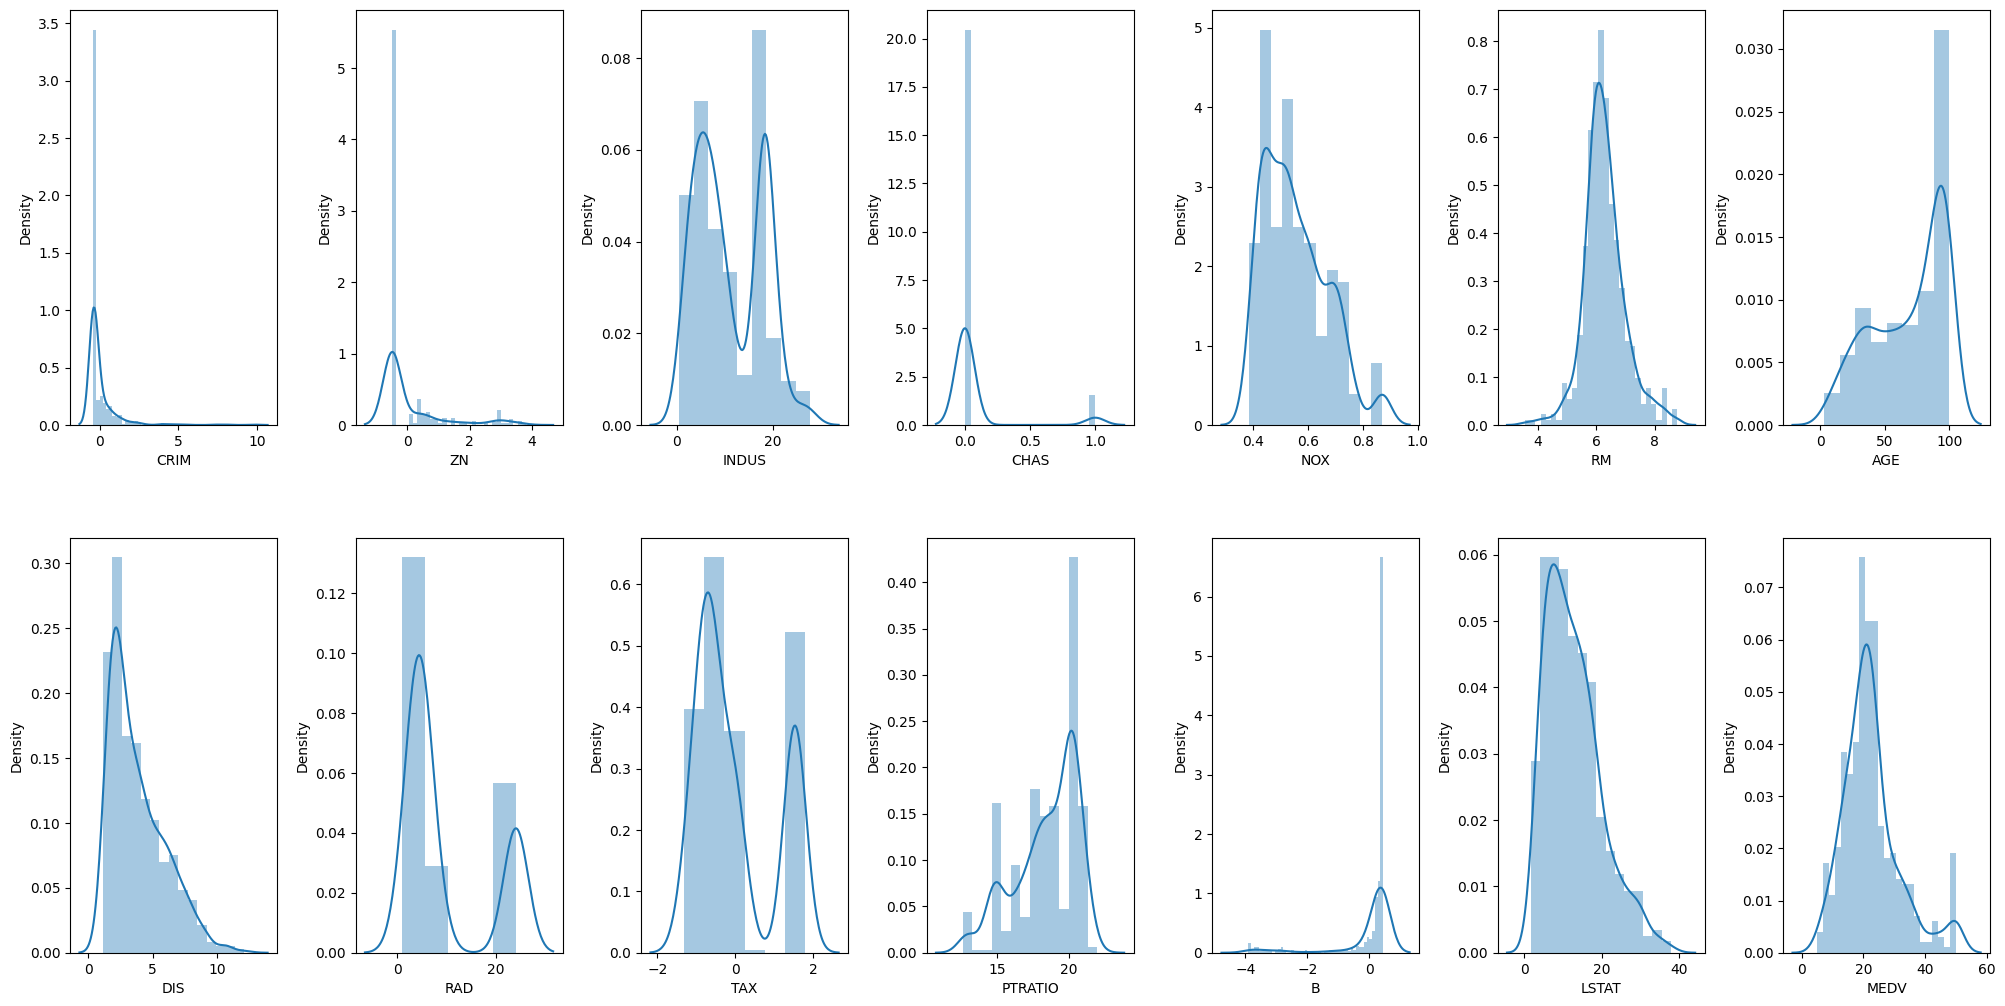

In [ ]:
for col in cols:
  df[col] = scaled_cols[col]
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
# Reminder: To fix the 'InvalidParameterError' in model training, please re-run the 'train' function definition cell (cell ID 3zG01OknlZzI) with the corrected 'scoring' parameter 'neg_mean_squared_error' before training models.

##Curve fitting
over, appropriate, under-fitting of curves

<Axes: >

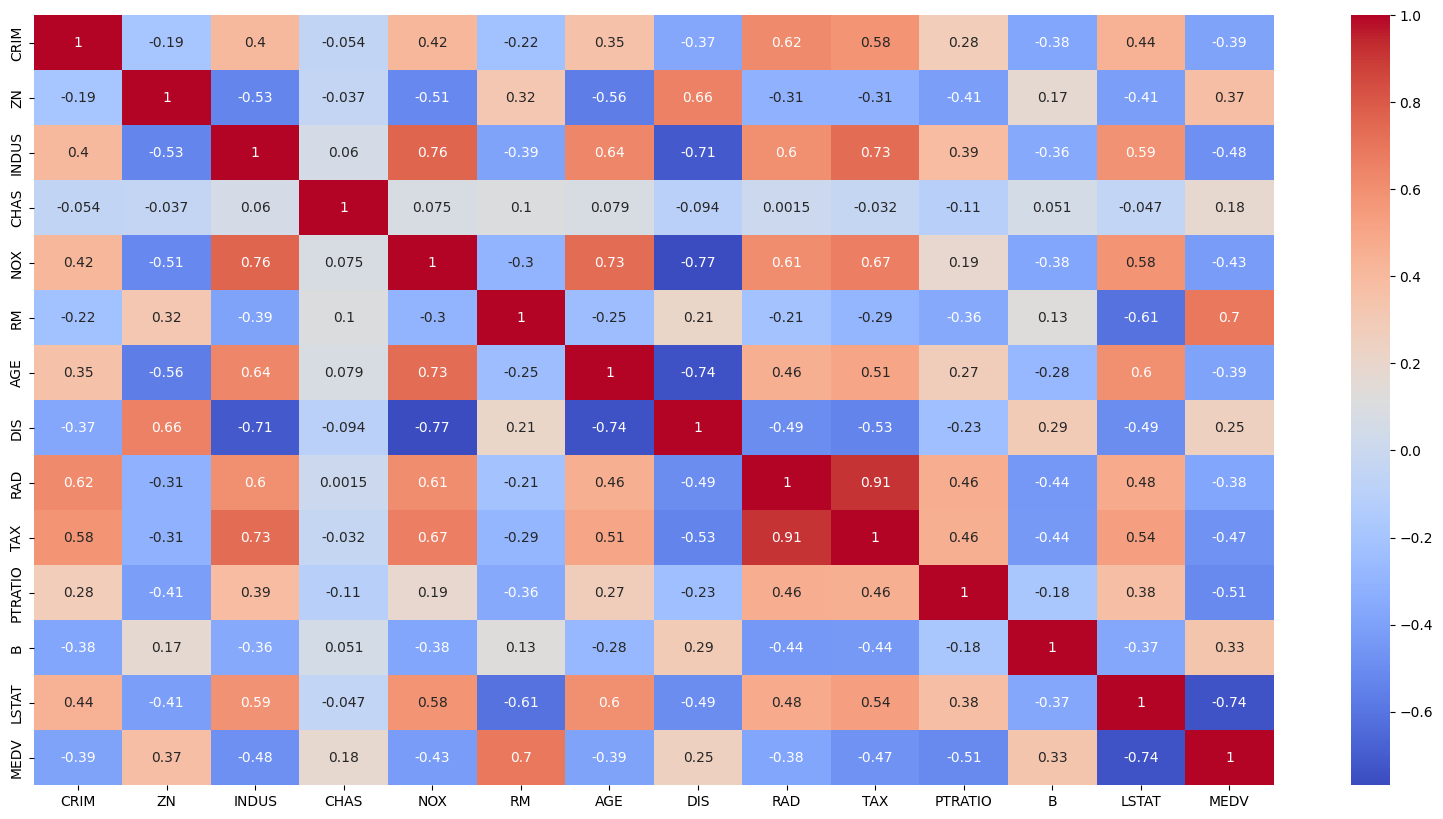

In [ ]:
#coorelation matrix

corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm' )

<Axes: xlabel='LSTAT', ylabel='MEDV'>

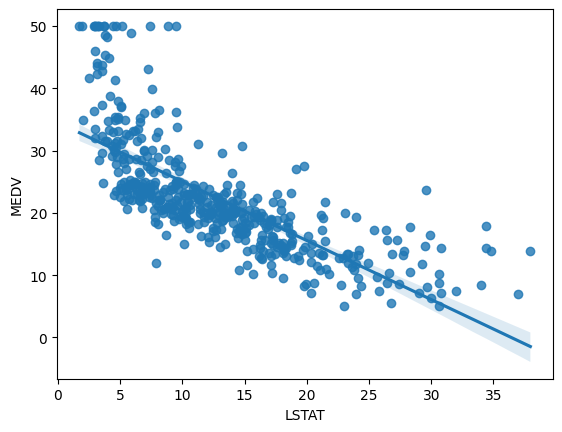

In [ ]:
sns.regplot(y=df['MEDV'], x=df['LSTAT'])

<Axes: xlabel='RM', ylabel='MEDV'>

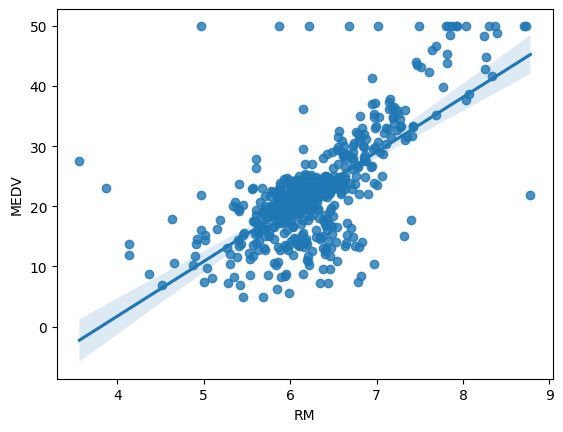

In [ ]:
sns.regplot(y=df['MEDV'], x=df['RM'])

#Train test split

In [ ]:
X = df.drop(columns = ['MEDV', 'RAD'], axis=1)
y = df['MEDV']


##Model training

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

def train(model, X, y):
  #train the model
  x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)

  #perform cross validation
  cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
  cv_score = np.abs(np.mean(cv_score))

  print("Model report")
  print("MSE:", mean_squared_error(y_test, pred)) # Corrected: use y_test instead of y
  print("CV Score:", cv_score)

Model report
MSE: 23.908980014226508
CV Score: 35.8900217002372


<Axes: title={'center': 'Modal Coefficients'}>

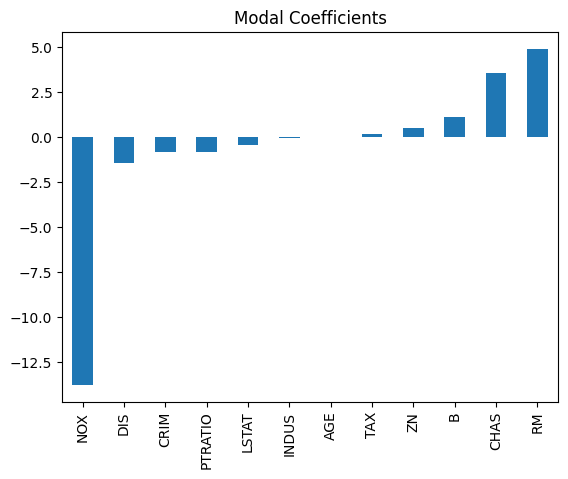

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ensure X is free of NaNs before training
X_cleaned = X.fillna(X.mean())
train(model, X_cleaned, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

Model report
MSE: 11.390629921259846
CV Score: 40.41474859250631


<Axes: title={'center': 'Feature Importance'}>

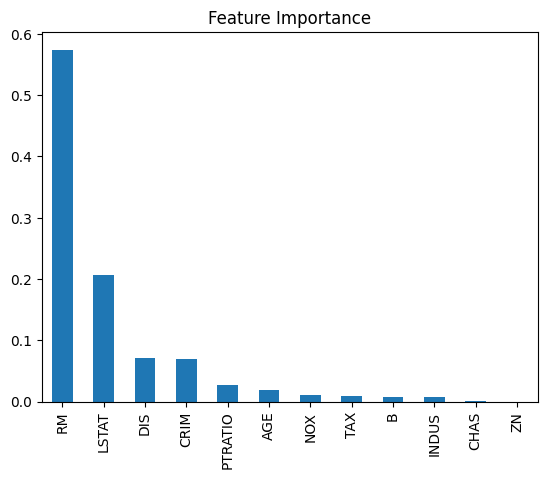

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

##Random forest regressor

Model report
MSE: 9.476306039370089
CV Score: 21.885516172917878


<Axes: title={'center': 'Feature Importance'}>

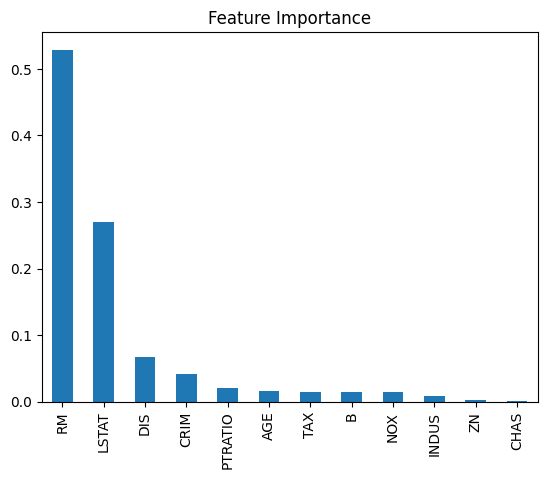

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

##Extra tree regressor

Model report
MSE: 11.923515677165359
CV Score: 20.684690712987752


<Axes: title={'center': 'Feature Importance'}>

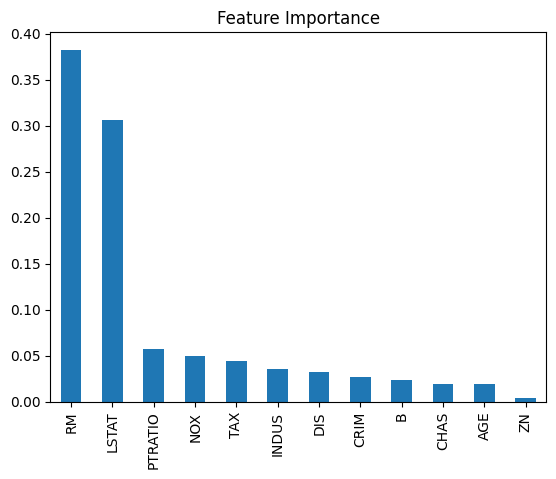

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model report
MSE: 7.687130297589053
CV Score: 25.867771014429742


<Axes: title={'center': 'Feature Importance'}>

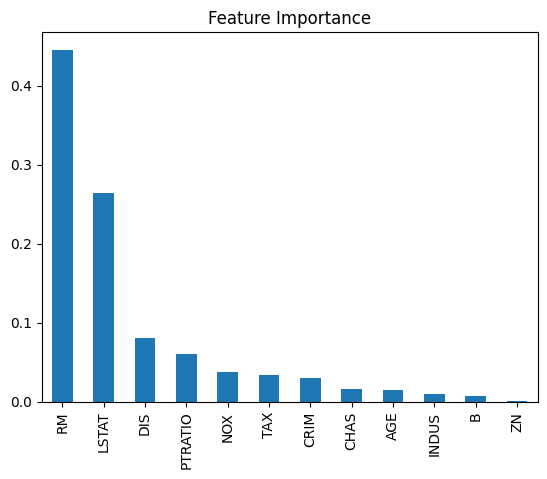

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')


NameError: name 'cv_score' is not defined